# AlerTiger Demo (Training / Inferencing / Visualization)

#### step-1: Setup Python environment and Install necessary libraries.
You may want to restart the Python Kernel (Click "Kernel" --> "Restart") in case of import failure.

In [ ]:
!pip install --upgrade pip
!pip install  -r ./requirements.txt

In [4]:
import datetime
import math
from unittest import TestCase
import numpy as np
import pandas as pd
import logging
from typing import List
from matplotlib import pyplot as plt
from alertiger.src.trainer import train_alertiger_model
from alertiger.src.inferencer import inference_alertiger_model
from alertiger.src.utils import mock_univariate_time_series_with_anomaly, visualize_time_series_with_anomaly

#### step-2: mock time series

In [5]:
# mock the time series for training
training_univariate_timeseries: List[pd.DataFrame] = mock_univariate_time_series_with_anomaly(
    start_date=datetime.date(2022, 1, 1),
    end_date=datetime.date(2023, 1, 1),
    seasonality_number_of_square_timeseries=50,
    seasonality_number_of_triangle_timeseries=50,
    seasonality_number_of_sine_timeseries=50,
    seasonality_number_of_constant_timeseries=50,
    random_phase = True)

# mock the time series for inference
testing_univariate_timeseries: List[pd.DataFrame] = mock_univariate_time_series_with_anomaly(
    start_date=datetime.date(2023, 1, 1),
    end_date=datetime.date(2023, 4, 1),
    seasonality_number_of_square_timeseries=1,
    seasonality_number_of_triangle_timeseries=1,
    seasonality_number_of_sine_timeseries=1,
    seasonality_number_of_constant_timeseries=1,
    random_phase = True)

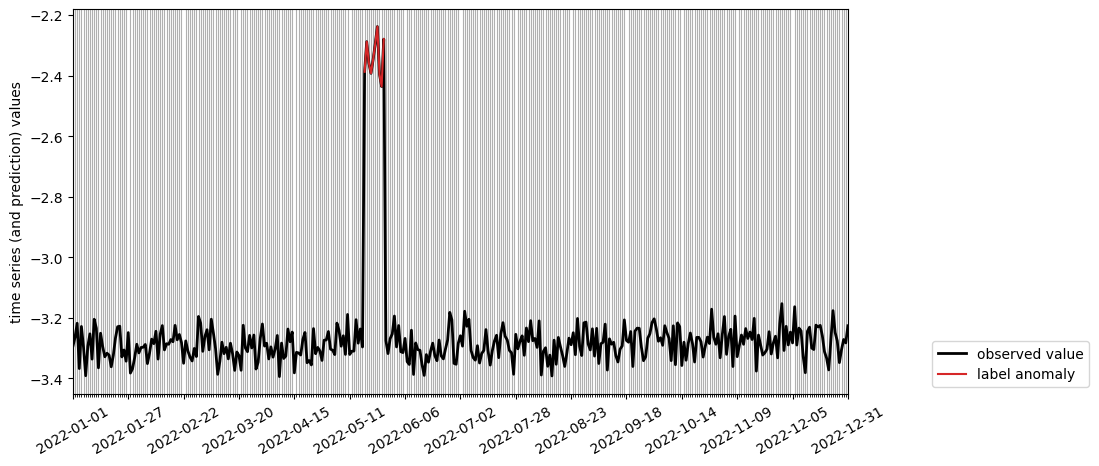

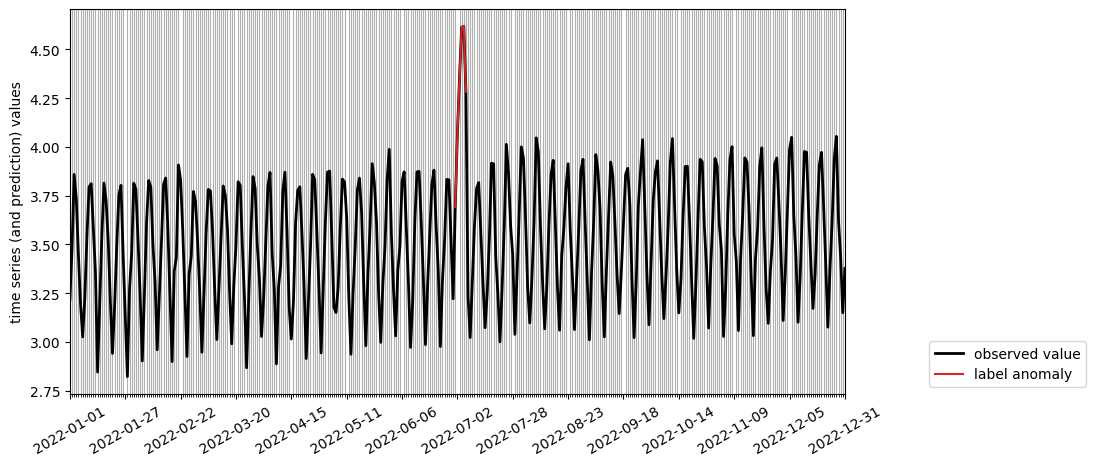

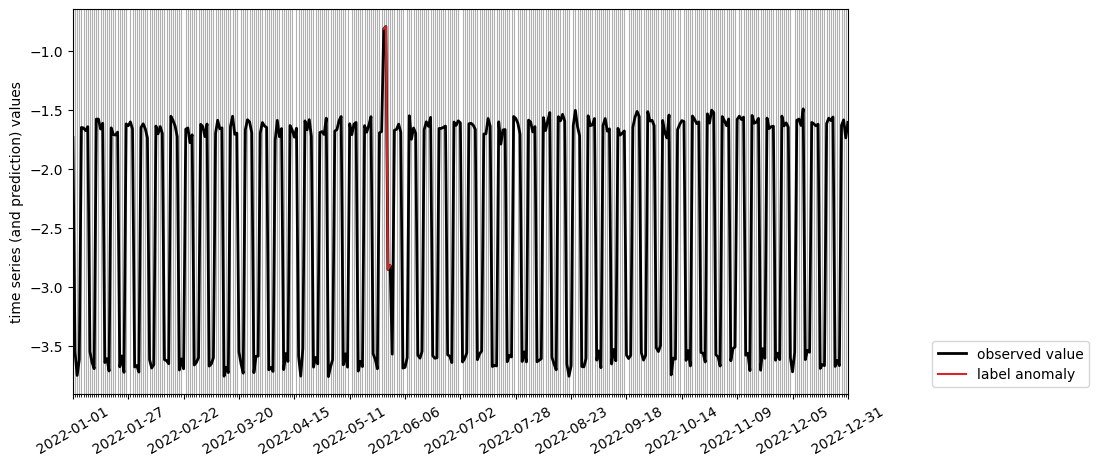

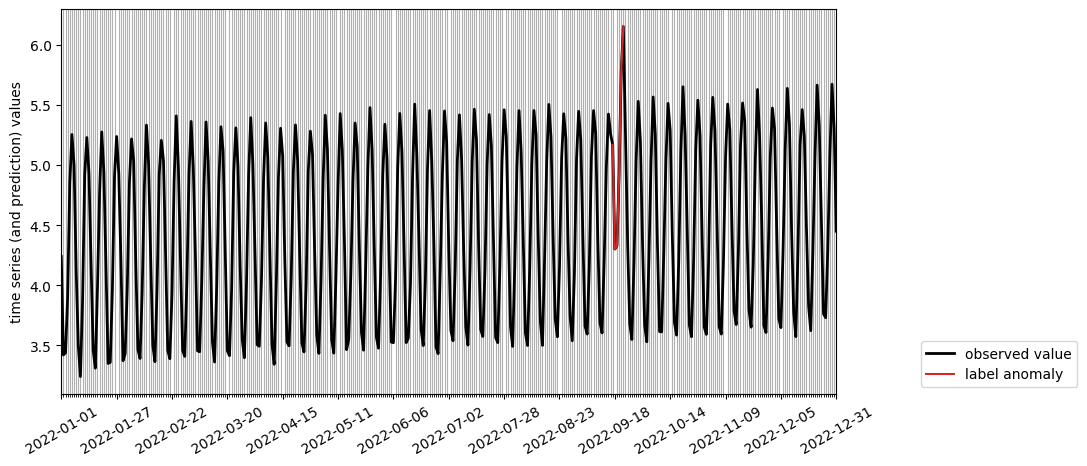

In [6]:
# find some examples for visualization,
# here we visualize one time series for each types in {constant, triangle, square, sine waves}.


for i in [5,55,105,155]:
    visualize_time_series_with_anomaly(training_univariate_timeseries[i])

### Step-3: Model Training

In [ ]:
alertiger_keras_model, history_forecast, history_classification = train_alertiger_model(
    list_univariate_timeseries_data=training_univariate_timeseries,
    epoch=50,
    start_date=datetime.date(2022, 1, 1),
    end_date=datetime.date(2023, 1, 1))
logging.info("training completed")

plt.plot(history_forecast.history['loss'])
plt.title("AlerTiger Forcast Model Training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()

plt.plot(history_classification.history['loss'])
plt.grid()
plt.title("AlerTiger Classification Model Training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

### Step-4: Model Inferencing

In [ ]:
prediction_result_dataframes: List[pd.DataFrame] = inference_alertiger_model(
    univariate_timeseries=testing_univariate_timeseries,
    alertiger_model=alertiger_keras_model)

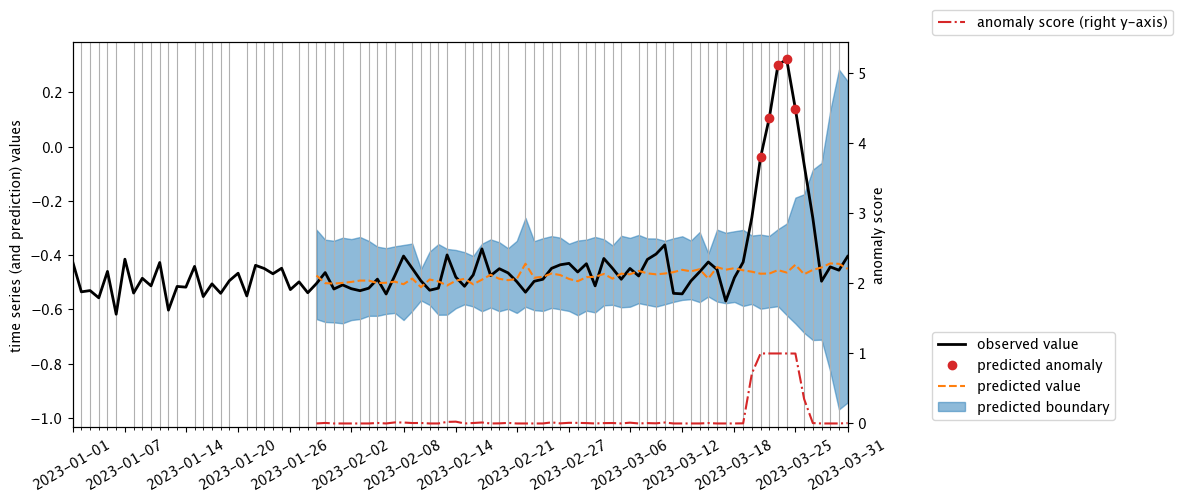

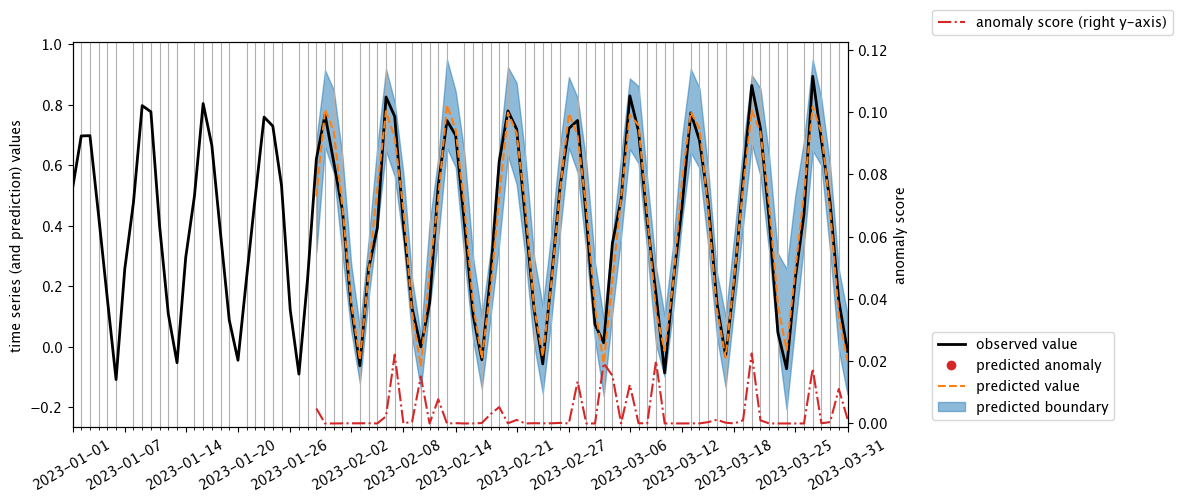

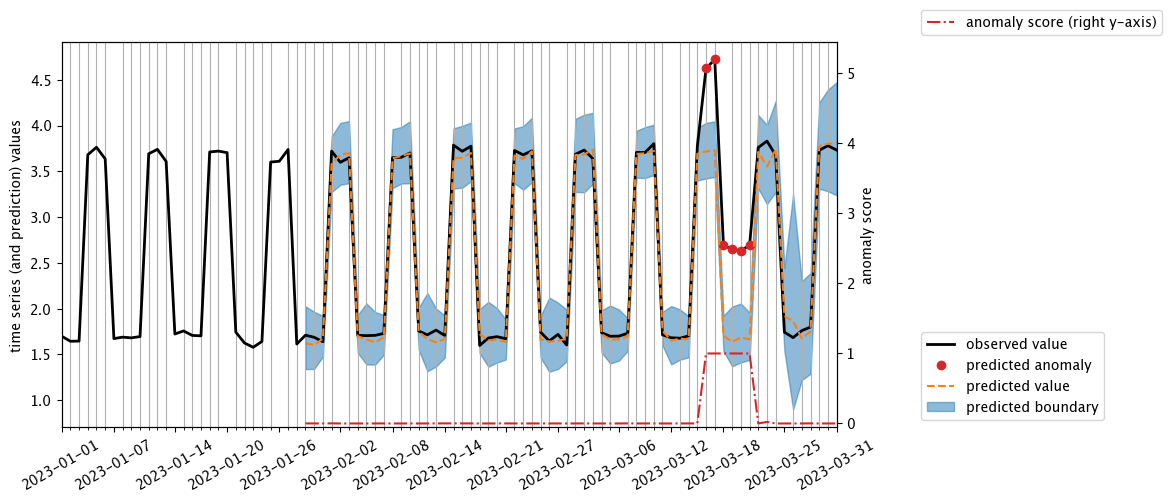

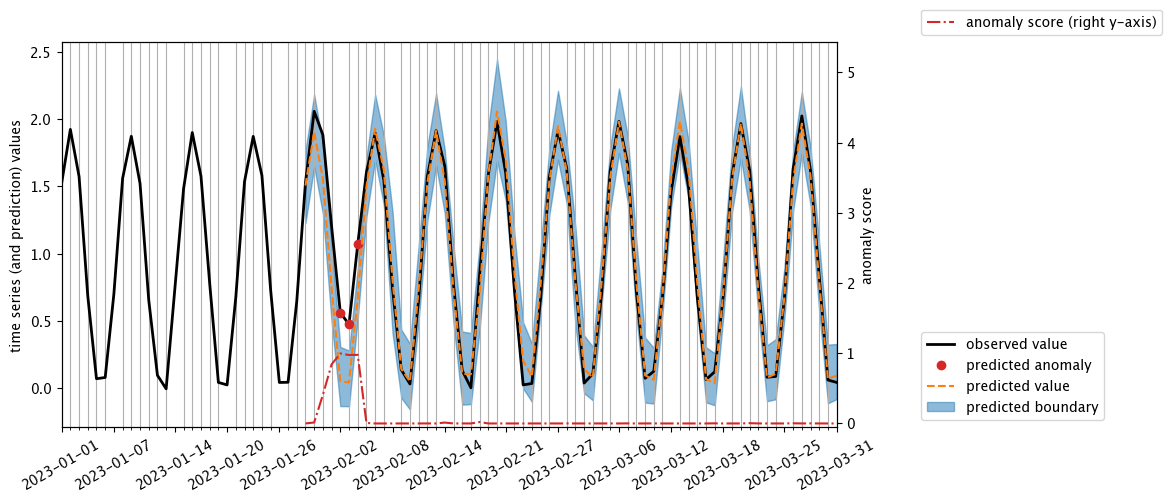

In [13]:
for result_df in prediction_result_dataframes:
    visualize_time_series_with_anomaly(df=result_df)